In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
stu_all = pd.read_excel('Study3.xlsx',sheet_name=2,header=1).dropna()

concept = pd.read_excel('Study3-full-profiles.xlsx',sheet_name=0)
concept = concept[['Participant','Category','CK1','CK2','CK-Gain','Comments']]
concept = concept.dropna()

# Clean the empty value

stu = stu_all[stu_all.At_video != 0.0]

tutorials = stu[(stu['Aspect'] <=4.0)]
tut_info = tutorials[['Username','Video','Aspect','Text']]

examples = stu[(stu['Aspect'] >= 5.0)]
exp_info = examples[['Username','Video','Aspect','Text']]

In [3]:

concept = concept[concept.Category == 'Constructive']
# concept.sort_values(by='CK-Gain',ascending=False)

In [4]:
sort_con =concept.sort_values(by='CK-Gain',ascending=False)

sort_con = sort_con[sort_con.Category == 'Constructive']

head = sort_con.head(5)

# middle = sort_con[sort_con.CK1 == sort_con.CK2]
# middle = middle.sample(n=3,random_state=1)

tail = sort_con.tail(5)

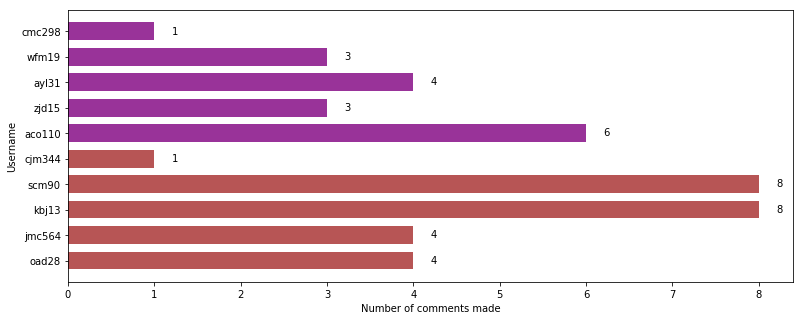

In [5]:
x = [4,4,8,8,1,6,3,4,3,1]

plt.figure(figsize=(13,5))


plt.barh(range(10), x, height=0.7, color=['brown','brown','brown','brown','brown','purple','purple','purple','purple','purple'], alpha=0.8)      # 从下往上画
plt.yticks(range(10), ['oad28','jmc564','kbj13','scm90','cjm344','aco110','zjd15','ayl31','wfm19','cmc298'])
plt.ylabel('Username')
for x, y in enumerate(x):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.xlabel('Number of comments made')

plt.show()


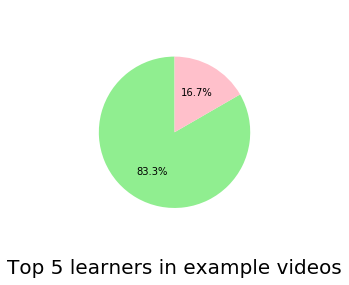

In [6]:
h = ['oad28','jmc564','kbj13','scm90','cjm344']
m = ['aco110','zjd15','ayl31','wfm19','cmc298']

hh = tut_info.loc[tut_info['Username'].isin(h)]
sizeh = hh['Aspect'].value_counts().tolist()

mm = tut_info.loc[tut_info['Username'].isin(m)]
sizem = mm['Aspect'].value_counts().tolist()


ee = exp_info.loc[exp_info['Username'].isin(h)]
sizee = ee['Aspect'].value_counts().tolist()

ff = exp_info.loc[exp_info['Username'].isin(m)]
sizef = ff['Aspect'].value_counts().tolist()

labels = ['VisualAids','Speech','Structure','Delivery']

plt.figure(figsize=(3,4.5)) 
colors1 = ['lightgreen','pink','lightblue','yellow'] 
colors2 = ['green','red','blue','yellow'] 

patches,text1,text2 = plt.pie(sizee,
                      
                      colors=colors1,
                      autopct = '%3.1f%%', 
                      shadow = False, 
                      startangle =90, 
                      pctdistance = 0.6) 

plt.axis('equal')
plt.xlabel('Top 5 learners in example videos',fontsize=20)
plt.show()